# 🎨 Image Compression using K-Means

 IMAGE COMPRESSION USING K-MEANS CLUSTERING

 Loaded image: 736x446 pixels
   Total pixels: 328,256

 RUNNING K-MEANS CLUSTERING

🎨 Processing image with k = 2 colors...
   ✓ Image with 2 colors generated

🎨 Processing image with k = 4 colors...
   ✓ Image with 4 colors generated

🎨 Processing image with k = 8 colors...
   ✓ Image with 8 colors generated

🎨 Processing image with k = 16 colors...
   ✓ Image with 16 colors generated

🎨 Processing image with k = 32 colors...
   ✓ Image with 32 colors generated

 COMPRESSION FACTORS

📏 Original size: 984,768 bytes
   (Height 446 × Width 736 × 3 RGB channels)

    K |      Compressed Size |      Compression Ratio
------------------------------------------------------------
    2 |          41,038 bytes |              24.00:1
    4 |          82,076 bytes |              12.00:1
    8 |         123,120 bytes |               8.00:1
   16 |         164,176 bytes |               6.00:1
   32 |         205,256 bytes |               4.80:1

 Gener

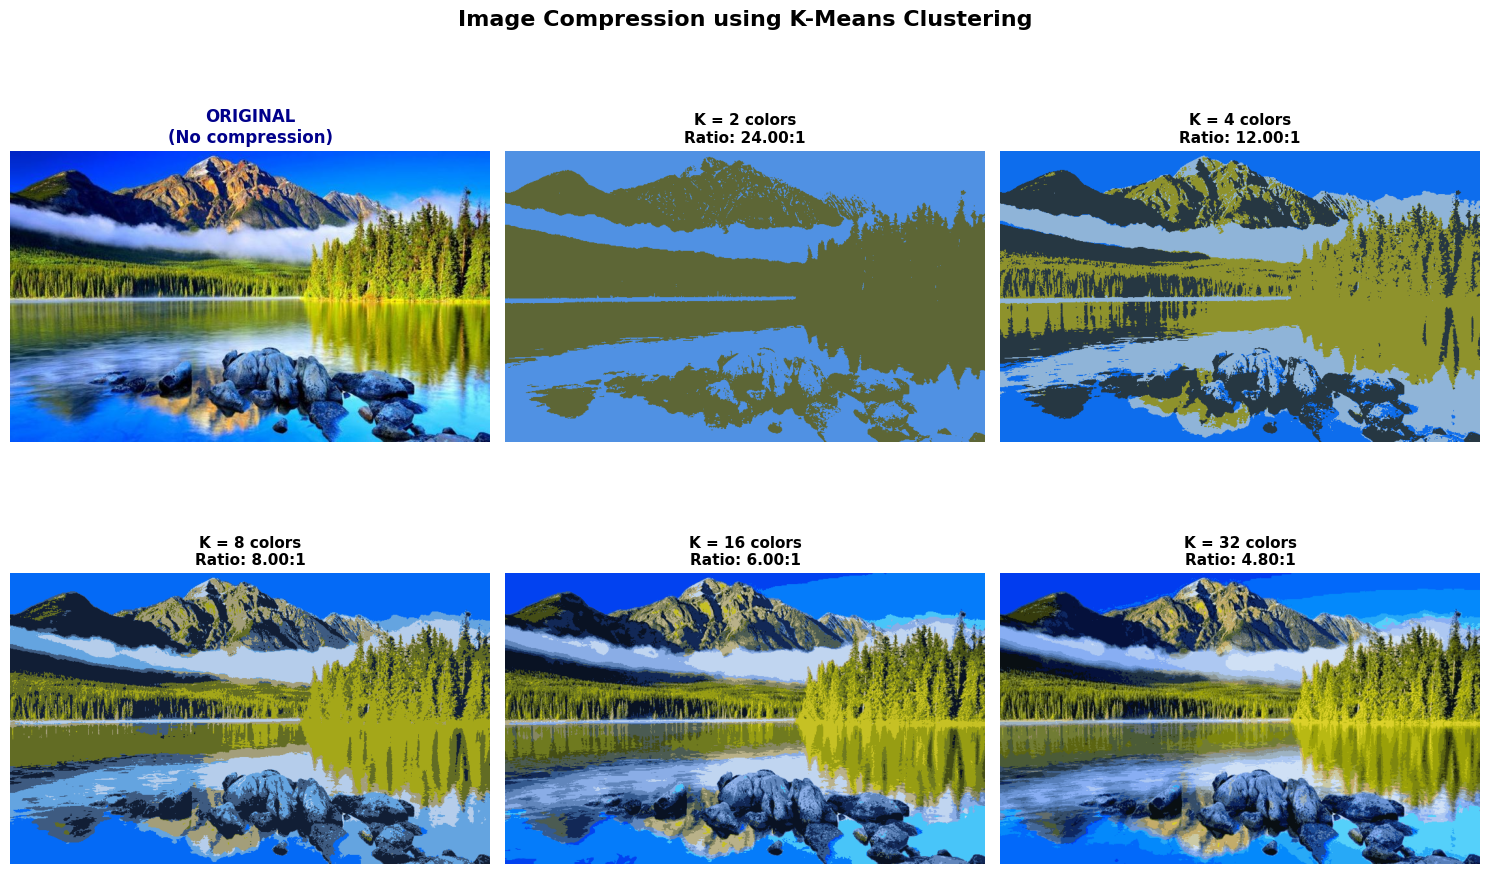


PROCESS COMPLETED

SUMMARY:
   • Original image: 736×446 pixels
   • Tested cluster values: [2, 4, 8, 16, 32]
   • Best compression: 24.00:1 (k=2)
   • Lowest compression: 4.80:1 (k=32)



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans


# LOAD ORIGINAL IMAGE

# First of all whe have to load the image and convert it to RGB format
img = Image.open("/Users/ariel/github/image-compression-kmeans/data/original.jpg")
img = img.convert("RGB")
img_array = np.array(img)

print("=" * 60)
print(" IMAGE COMPRESSION USING K-MEANS CLUSTERING")
print("=" * 60)
print(f"\n Loaded image: {img_array.shape[1]}x{img_array.shape[0]} pixels")
print(f"   Total pixels: {img_array.shape[0] * img_array.shape[1]:,}")


# APPLY K-MEANS CLUSTERING

# Prepare pixel data by flattening the image into (num_pixels, 3)
h, w, channels = img_array.shape
pixels = img_array.reshape(-1, 3)

# Different k values to test how many colors we keep
k_values = [2, 4, 8, 16, 32]
compressed_images = {}

print("\n" + "=" * 60)
print(" RUNNING K-MEANS CLUSTERING")
print("=" * 60)

for k in k_values:
    print(f"\n Processing image with k = {k} colors...")
    
    # Fit K-Means to the pixel data
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    # Each pixel is replaced by the centroid of its assigned cluster
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    
    # Reshape back to original image dimensions
    compressed = new_colors.reshape(h, w, 3).astype(np.uint8)
    compressed_images[k] = compressed
    
    print(f"   ✓ Image with {k} colors generated")


# CALCULATE COMPRESSION FACTOR

print("\n" + "=" * 60)
print(" COMPRESSION FACTORS")
print("=" * 60)

# Original size: each pixel takes 3 bytes (RGB)
original_size = h * w * 3

print(f"\nOriginal size: {original_size:,} bytes")
print(f"   (Height {h} × Width {w} × 3 RGB channels)\n")

print(f"{'K':>5} | {'Compressed Size':>20} | {'Compression Ratio':>22}")
print("-" * 60)

compression_factors = {}

for k in k_values:
    # Compressed size = color palette + cluster index storage
    palette_size = k * 3
    indices_size = (h * w * np.ceil(np.log2(k)) / 8)
    compressed_size = palette_size + indices_size
    
    # Compression ratio
    compression_factor = original_size / compressed_size
    compression_factors[k] = compression_factor
    
    print(f"{k:>5} | {compressed_size:>15,.0f} bytes | {compression_factor:>18.2f}:1")

print("=" * 60)


# VISUALIZE RESULTS

print("\n Generating comparison plot...")

# Create a grid showing original + compressed images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Show original image
axes[0].imshow(img_array)
axes[0].set_title('ORIGINAL\n(No compression)', 
                  fontsize=12, fontweight='bold', color='darkblue')
axes[0].axis('off')

# Show compressed versions for each k
for idx, k in enumerate(k_values, 1):
    axes[idx].imshow(compressed_images[k])
    axes[idx].set_title(f'K = {k} colors\nRatio: {compression_factors[k]:.2f}:1', 
                        fontsize=11, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('Image Compression using K-Means Clustering', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


# FINAL SUMMARY

print("\n" + "=" * 60)
print("PROCESS COMPLETED")
print("=" * 60)
print("\nSUMMARY:")
print(f"   • Original image: {w}×{h} pixels")
print(f"   • Tested cluster values: {k_values}")
print(f"   • Best compression: {max(compression_factors.values()):.2f}:1 (k={max(compression_factors, key=compression_factors.get)})")
print(f"   • Lowest compression: {min(compression_factors.values()):.2f}:1 (k={min(compression_factors, key=compression_factors.get)})")
print("\n" + "=" * 60)